<font size=7> Burst Attempt

In [1]:
from human_hip import spike_data
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [4]:
def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

def firing_plotter(sd):
    firing_rates = calculate_mean_firing_rates(sd)

    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    plt.figure(figsize=(8, 6))
    plt.scatter(neuron_x, neuron_y, s=firing_rates*20 + firing_rates**1.5, alpha=0.3, c='r')
    plt.show()


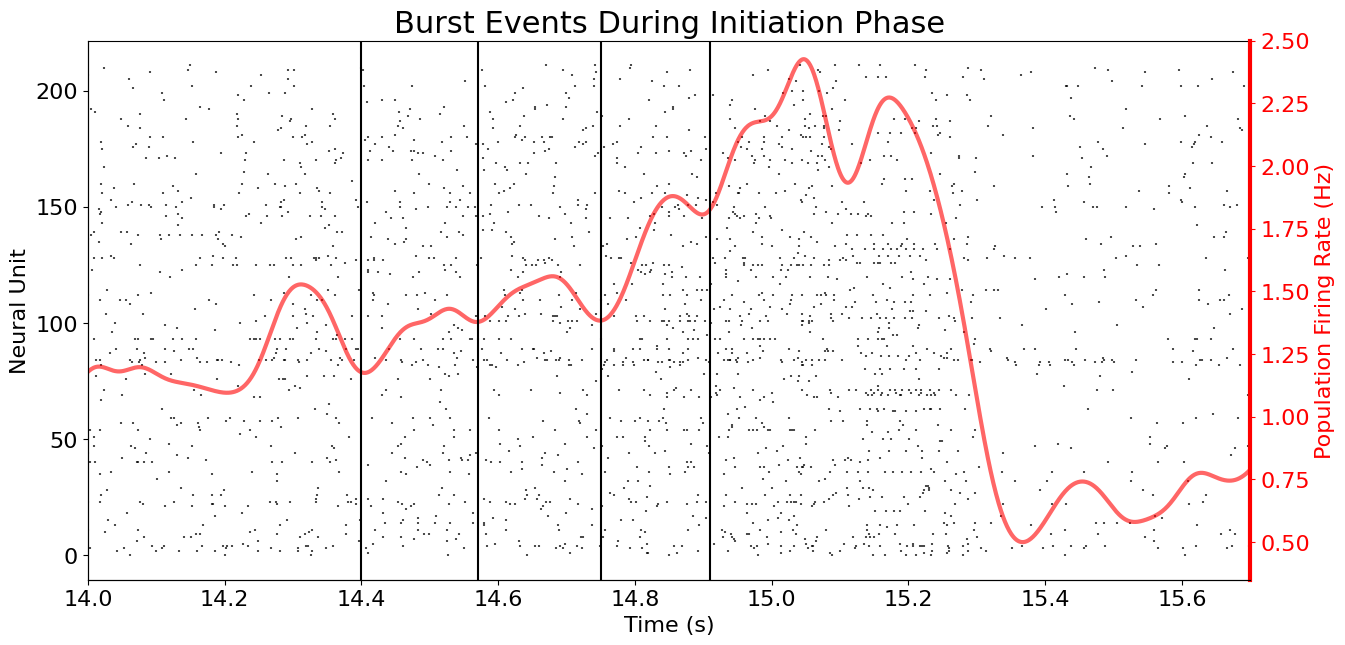

In [6]:
spike_data.plot_raster( sd, size=(15,7), xlim=(14, 15.7), smoothness=28, ylim=(0.35,2.5),
                         title="Burst Events During Initiation Phase" )
axs = plt.gca()
axs.vlines( [14.4, 14.57, 14.75, 14.91], 0.35, 2.5, color='black' )

In [ ]:
sd1 = sd.subtime( 14.4*1000 ,  14.57*1000 )
sd2 = sd.subtime( 14.57*1000 ,  14.75*1000 )
sd3 = sd.subtime(  14.75*1000, 14.91*1000 )

firings_1 = calculate_mean_firing_rates(sd1)
firings_2 = calculate_mean_firing_rates(sd2)
firings_3 = calculate_mean_firing_rates(sd3)

firings_diff_1 =  firings_1-firings_2
firings_diff_2 =  firings_2-firings_3

/tmp/ipykernel_2438/2780310550.py:15: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


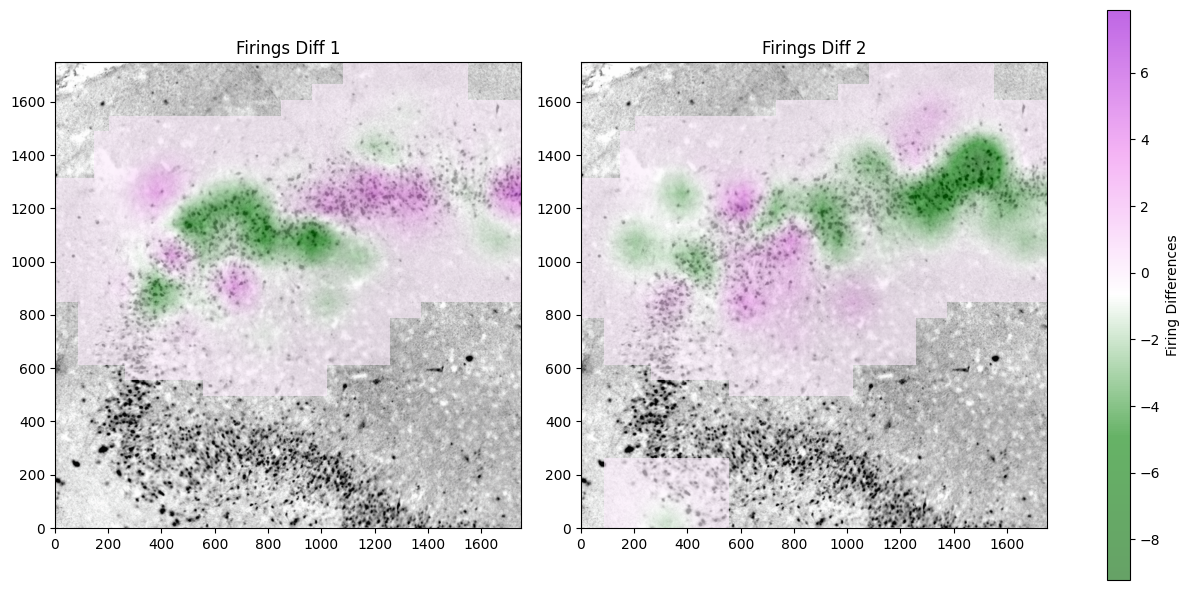

In [22]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("my_cmap", ['darkgreen', 'green', "white" , 'violet' , 'darkviolet' ])

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from scipy.ndimage import gaussian_filter

img = plt.imread("/workspaces/human_hippocampus/data/histology/hc112823_bw.png")

neuron_x = []
neuron_y = []

for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])

mean1 = np.mean(firings_diff_1)
std1 = np.std(firings_diff_1)
mean2 = np.mean(firings_diff_2)
std2 = np.std(firings_diff_2)

# Determine global min and max for the colorbar
global_min = min(mean1 - std1, mean2 - std2)
global_max = max(mean1 + std1, mean2 + std2)

# Normalize both datasets based on the global min and max
norm1 = plt.Normalize(vmin=global_min, vmax=global_max)
norm2 = plt.Normalize(vmin=global_min, vmax=global_max)

plt.figure(figsize=(12, 6))

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05])

# Plot for firings_diff_1
ax1 = plt.subplot(gs[0])
ax1.imshow(img, extent=[0, 3850, 0, 2100])
heatmap1, xedges1, yedges1 = np.histogram2d(neuron_x, neuron_y, bins=30, weights=firings_diff_1, range=[[0, 1750], [0, 1750]])
heatmap1 = gaussian_filter(heatmap1, sigma=1)
heatmap1 = np.ma.masked_where(heatmap1 == 0, heatmap1)
im1 = ax1.imshow(heatmap1.T, extent=[0, 1750, 0, 1750], origin='lower', cmap=cmap, norm=norm1, alpha=0.6, interpolation='bilinear')
ax1.set_title('Firings Diff 1')

# Plot for firings_diff_2
ax2 = plt.subplot(gs[1], sharex=ax1, sharey=ax1)
ax2.imshow(img, extent=[0, 3850, 0, 2100])
heatmap2, xedges2, yedges2 = np.histogram2d(neuron_x, neuron_y, bins=30, weights=firings_diff_2, range=[[0, 1750], [0, 1750]])
heatmap2 = gaussian_filter(heatmap2, sigma=1)
heatmap2 = np.ma.masked_where(heatmap2 == 0, heatmap2)
im2 = ax2.imshow(heatmap2.T, extent=[0, 1750, 0, 1750], origin='lower', cmap=cmap, norm=norm2, alpha=0.6, interpolation='bilinear')
ax2.set_title('Firings Diff 2')

cbar_ax = plt.subplot(gs[2])
cbar = plt.colorbar(im2, cax=cbar_ax)
cbar.set_label('Firing Differences')

plt.subplots_adjust(wspace=0.05, hspace=0.05, right=0.85)
plt.tight_layout()
plt.show()

(0.0, 1750.0)

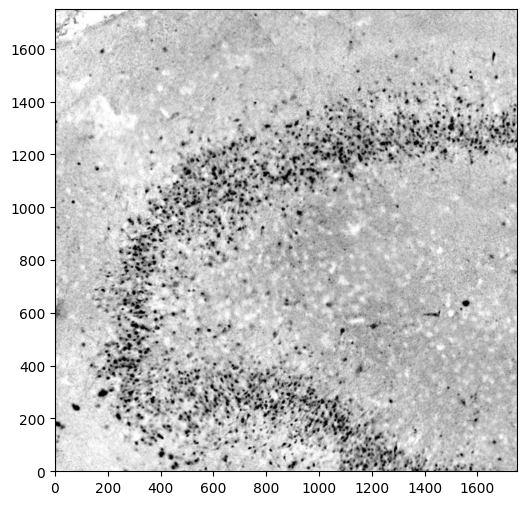

In [16]:
plt.figure(figsize=(12, 6))
img = plt.imread("/workspaces/human_hippocampus/data/histology/hc112823_bw.png")
plt.imshow(img, extent=[0, 3850, 0, 2100])
plt.xlim(0,1750)
plt.ylim(0,1750)
